In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('delivery_time.csv')
df.head()

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


# EDA & Data Visualization

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Delivery Time  21 non-null     float64
 1   Sorting Time   21 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 464.0 bytes


C:\Users\USER\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Delivery Time', ylabel='Density'>

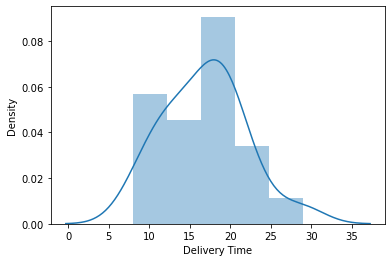

In [4]:
sns.distplot(df['Delivery Time'])

C:\Users\USER\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Sorting Time', ylabel='Density'>

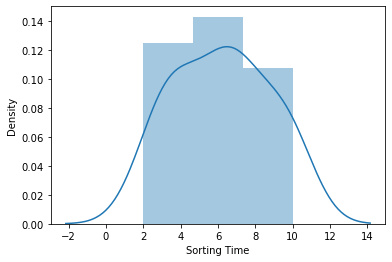

In [6]:
sns.distplot(df['Sorting Time'])

# Feature Engineering

In [5]:
data=df.rename({'Delivery Time':'delivery_time', 'Sorting Time':'sorting_time'},axis=1)
data

,delivery_time,sorting_time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


# Correlation Analysis

In [6]:
data.corr()

,delivery_time,sorting_time
delivery_time,1.000000,0.825997
sorting_time,0.825997,1.000000


# Model Building

In [7]:
import statsmodels.formula.api as smf

In [8]:
model=smf.ols("delivery_time~sorting_time",data=data).fit()

In [9]:
model.params

Intercept       6.582734
sorting_time    1.649020
dtype: float64

In [14]:
model.tvalues , model.pvalues

(Intercept       3.823349
 sorting_time    6.387447
 dtype: float64,
 Intercept       0.001147
 sorting_time    0.000004
 dtype: float64)

In [10]:
model.rsquared , model.rsquared_adj

(0.6822714748417231, 0.6655489208860244)

In [11]:
# 95% confidence interval
model.conf_int(0.05)

,0,1
Intercept,2.979134,10.186334
sorting_time,1.108673,2.189367


In [12]:
# Predict the value using this model
pred = model.predict(data)
pred

0     23.072933
1     13.178814
2     16.476853
3     21.423913
4     23.072933
5     16.476853
6     18.125873
7     11.529794
8     23.072933
9     21.423913
10    19.774893
11    13.178814
12    18.125873
13    11.529794
14    11.529794
15    13.178814
16    16.476853
17    18.125873
18     9.880774
19    18.125873
20    14.827833
dtype: float64

Text(0, 0.5, 'delivery time')

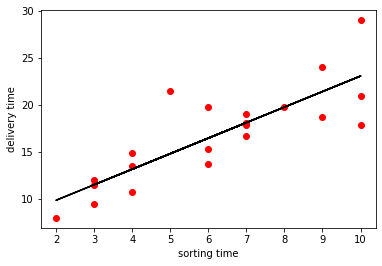

In [13]:
# Visualization of regression
import matplotlib.pylab as plt
plt.scatter(x=data['sorting_time'],y=data['delivery_time'],color='red');plt.plot(data['sorting_time'],pred,color='black');plt.xlabel('sorting time');plt.ylabel('delivery time')

In [14]:
pred.corr(data.delivery_time)

0.8259972607955325

In [15]:
# Transforming variables for accuracy
model2=smf.ols("delivery_time~np.log(sorting_time)",data=data).fit()

In [16]:
model2.params

Intercept               1.159684
np.log(sorting_time)    9.043413
dtype: float64

In [17]:
model2.tvalues , model2.pvalues

(Intercept               0.472460
 np.log(sorting_time)    6.586789
 dtype: float64,
 Intercept               0.641980
 np.log(sorting_time)    0.000003
 dtype: float64)

In [18]:
model2.rsquared , model2.rsquared_adj

(0.6954434611324223, 0.6794141696130761)

In [19]:
# 99% confidence interval
print(model2.conf_int(0.01))

                             0          1
Intercept            -5.862666   8.182033
np.log(sorting_time)  5.115458  12.971369


In [20]:
pred2 = model2.predict(pd.DataFrame(data['sorting_time']))
pred2

0     21.982913
1     13.696517
2     17.363305
3     21.030094
4     21.982913
5     17.363305
6     18.757354
7     11.094889
8     21.982913
9     21.030094
10    19.964933
11    13.696517
12    18.757354
13    11.094889
14    11.094889
15    13.696517
16    17.363305
17    18.757354
18     7.428100
19    18.757354
20    15.714496
dtype: float64

In [21]:
pred2.corr(data.delivery_time)

0.8339325279256244

Text(0, 0.5, 'delivery time')

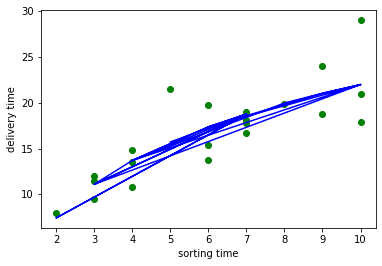

In [22]:
# Visualization of regression
import matplotlib.pylab as plt
plt.scatter(x=data['sorting_time'],y=data['delivery_time'],color='green');plt.plot(data['sorting_time'],pred2,color='blue');plt.xlabel('sorting time');plt.ylabel('delivery time')

In [23]:
# Exponential transformation
model3=smf.ols("np.log(delivery_time)~sorting_time",data=data).fit()

In [24]:
model3.params

Intercept       2.121372
sorting_time    0.105552
dtype: float64

In [25]:
model3.tvalues , model3.pvalues

(Intercept       20.601357
 sorting_time     6.836088
 dtype: float64,
 Intercept       1.857343e-14
 sorting_time    1.592708e-06
 dtype: float64)

In [26]:
model3.rsquared , model3.rsquared_adj

(0.7109478980584187, 0.6957346295351776)

In [27]:
# 99% confidence interval
print(model3.conf_int(0.01))

                     0         1
Intercept     1.826774  2.415969
sorting_time  0.061378  0.149725


In [28]:
pred_log = model3.predict(pd.DataFrame(data['sorting_time']))
pred_log

0     3.176888
1     2.543578
2     2.754681
3     3.071336
4     3.176888
5     2.754681
6     2.860233
7     2.438027
8     3.176888
9     3.071336
10    2.965785
11    2.543578
12    2.860233
13    2.438027
14    2.438027
15    2.543578
16    2.754681
17    2.860233
18    2.332475
19    2.860233
20    2.649130
dtype: float64

In [31]:
 # as we have used log(AT) in preparing model so we need to convert it back
pred3=np.exp(pred_log)
pred3

0     23.972032
1     12.725123
2     15.716034
3     21.570707
4     23.972032
5     15.716034
6     17.465597
7     11.450423
8     23.972032
9     21.570707
10    19.409927
11    12.725123
12    17.465597
13    11.450423
14    11.450423
15    12.725123
16    15.716034
17    17.465597
18    10.303411
19    17.465597
20    14.141728
dtype: float64

In [32]:
pred3.corr(data.delivery_time)

0.808578010828926

Text(0, 0.5, 'delivery time')

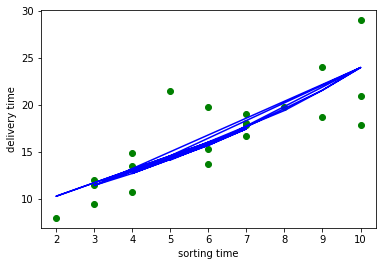

In [33]:
# Visualization of regression
import matplotlib.pylab as plt
plt.scatter(x=data['sorting_time'],y=data['delivery_time'],color='green');plt.plot(data['sorting_time'],pred3,color='blue');plt.xlabel('sorting time');plt.ylabel('delivery time')

In [42]:
# model3 having highest R-squared value

In [34]:
# getting residuals of the entire data set

data_resid=model3.resid_pearson
data_resid

array([-0.75408795,  0.33675889,  1.3016092 ,  0.60797197,  1.08475764,
       -0.13425573,  0.47972269, -1.06383166, -1.66402537, -0.79839415,
        0.12198057, -0.9609301 , -0.26219179,  0.02461332,  0.28130094,
        0.89124014, -0.7613643 ,  0.20640995, -1.44153627,  0.11763994,
        2.38661208])

Text(0, 0.5, 'Standardized Residual')

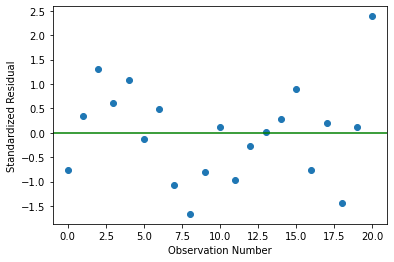

In [35]:
plt.plot(model3.resid_pearson,'o');plt.axhline(y=0,color='green');plt.xlabel("Observation Number");plt.ylabel("Standardized Residual")

Text(0, 0.5, 'Actual')

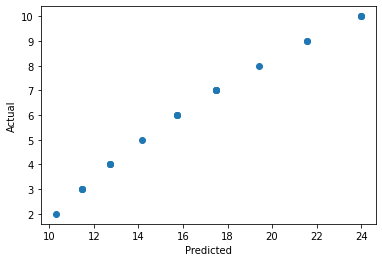

In [36]:
# Predicted vs Actual Values
plt.scatter(x=pred3,y=data.sorting_time);plt.xlabel("Predicted");plt.ylabel("Actual")

In [37]:
# Quadratic Model
sorting_sq = data.sorting_time*data.sorting_time

In [38]:
model_quad = smf.ols("delivery_time~sorting_time+sorting_sq",data=data).fit()

In [39]:
model_quad.params

Intercept       3.522234
sorting_time    2.813002
sorting_sq     -0.093198
dtype: float64

In [40]:
model_quad.tvalues , model_quad.pvalues

(Intercept       0.846756
 sorting_time    1.925632
 sorting_sq     -0.809783
 dtype: float64,
 Intercept       0.408248
 sorting_time    0.070097
 sorting_sq      0.428641
 dtype: float64)

In [41]:
model3.rsquared , model_quad.rsquared_adj

(0.7109478980584187, 0.659377363835583)

In [43]:
pred_quad = model_quad.predict(data.sorting_time)

In [44]:
# 95% confidence interval
model_quad.conf_int(0.05)

,0,1
Intercept,-5.216926,12.261394
sorting_time,-0.256067,5.882070
sorting_sq,-0.334994,0.148598


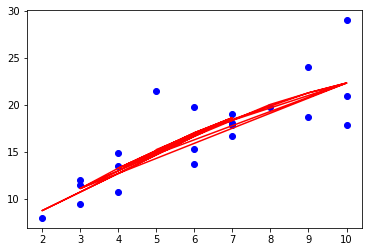

In [45]:
plt.scatter(data.sorting_time,data.delivery_time,c="b");plt.plot(data.sorting_time,pred_quad,"r")

(array([1., 3., 4., 4., 4., 1., 2., 0., 0., 2.]),
 array([-1.49650277, -1.12173808, -0.74697339, -0.37220871,  0.00255598,
         0.37732067,  0.75208535,  1.12685004,  1.50161472,  1.87637941,
         2.2511441 ]),
 <BarContainer object of 10 artists>)

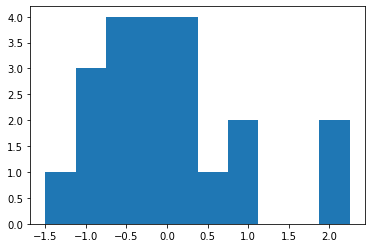

In [48]:
plt.hist(model_quad.resid_pearson)